# Linear Regression


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [3]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2 * x) + 0.8 * x + 0.3 * np.random.randn(100)

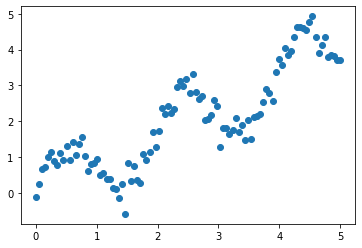

In [5]:
plt.scatter(x, y)

#### nonlinear

In [6]:
regr_lin = LinearRegression()

In [8]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [9]:
regr_lin.fit(X,y)

LinearRegression()

0.5312056926275127


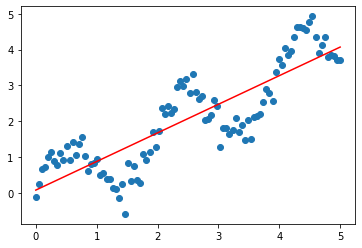

In [11]:
Y = regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x, Y , color='r')
mse = np.sum((Y - y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b
             =w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [11]:
print(x.shape)

(100,)


In [13]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
#print(X_poly)
print(X_poly.shape)

(100, 5)


In [14]:
regr_poly = LinearRegression()

In [15]:
regr_poly.fit(X_poly, y)

LinearRegression()

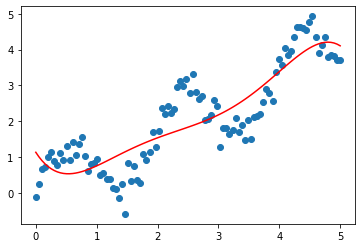

In [16]:
plt.scatter(x, y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [17]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-2.65767395  3.73624759 -1.82601228  0.3995069  -0.03154632]
interception:  1.1284732047221948


In [18]:
W = regr_poly.coef_
b = regr_poly.intercept_
np.dot(X_poly, W.T) + b

array([1.1284732 , 1.00354487, 0.89630173, 0.80542437, 0.72965328,
       0.6677876 , 0.61868389, 0.58125484, 0.55446811, 0.53734498,
       0.52895922, 0.52843575, 0.53494944, 0.54772387, 0.56603008,
       0.58918531, 0.61655177, 0.64753542, 0.68158466, 0.71818915,
       0.75687855, 0.79722126, 0.83882318, 0.88132648, 0.92440835,
       0.96777973, 1.01118411, 1.05439628, 1.09722104, 1.13949199,
       1.18107032, 1.22184348, 1.26172402, 1.30064831, 1.33857527,
       1.37548519, 1.41137842, 1.44627418, 1.48020926, 1.51323685,
       1.54542523, 1.57685654, 1.60762556, 1.63783846, 1.66761154,
       1.69706998, 1.72634663, 1.75558074, 1.78491672, 1.81450291,
       1.8444903 , 1.87503133, 1.90627863, 1.93838376, 1.97149598,
       2.00576101, 2.04131978, 2.07830718, 2.11685084, 2.15706985,
       2.19907354, 2.24296023, 2.288816  , 2.33671342, 2.38671032,
       2.43884855, 2.49315272, 2.54962899, 2.60826379, 2.66902257,
       2.73184861, 2.79666173, 2.86335703, 2.93180372, 3.00184

In [19]:
regr_poly.predict(X_poly)

array([1.1284732 , 1.00354487, 0.89630173, 0.80542437, 0.72965328,
       0.6677876 , 0.61868389, 0.58125484, 0.55446811, 0.53734498,
       0.52895922, 0.52843575, 0.53494944, 0.54772387, 0.56603008,
       0.58918531, 0.61655177, 0.64753542, 0.68158466, 0.71818915,
       0.75687855, 0.79722126, 0.83882318, 0.88132648, 0.92440835,
       0.96777973, 1.01118411, 1.05439628, 1.09722104, 1.13949199,
       1.18107032, 1.22184348, 1.26172402, 1.30064831, 1.33857527,
       1.37548519, 1.41137842, 1.44627418, 1.48020926, 1.51323685,
       1.54542523, 1.57685654, 1.60762556, 1.63783846, 1.66761154,
       1.69706998, 1.72634663, 1.75558074, 1.78491672, 1.81450291,
       1.8444903 , 1.87503133, 1.90627863, 1.93838376, 1.97149598,
       2.00576101, 2.04131978, 2.07830718, 2.11685084, 2.15706985,
       2.19907354, 2.24296023, 2.288816  , 2.33671342, 2.38671032,
       2.43884855, 2.49315272, 2.54962899, 2.60826379, 2.66902257,
       2.73184861, 2.79666173, 2.86335703, 2.93180372, 3.00184

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [20]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2 / (2 * sigma**2))
    return k

In [21]:
sigma = 0.3

In [22]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])

In [23]:
regr_rbf = LinearRegression()

In [24]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

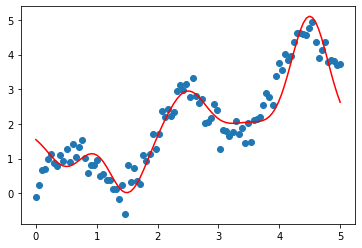

In [25]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [26]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.02331772 -1.78662318  1.15387033  0.23134119  3.30259357]
interception:  1.8042790602979453


#### Comparison

In [27]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

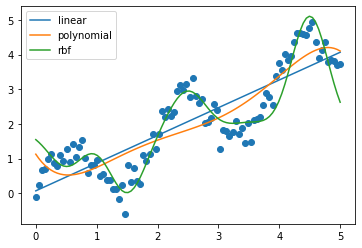

In [29]:
plt.scatter(x, y)
plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [30]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5312056926275127


In [31]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.458029949974629


In [32]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.21726822683512556
